In [1]:
from util.preprocessing import refine, initialize_tokenizer, vectorize
from util.embeddings import load_glove, load_word2vec_pretrained
from sklearn.datasets import fetch_20newsgroups
from util.NLP import NLPModel
from util.constants import TEST_SIZE, GLOVE, WORD2VEC, MODEL_TYPE_CNN, MODEL_TYPE_LSTM, MODEL_TYPE_CNN_LSTM
from sklearn.model_selection import train_test_split
from util.graphs import plotModelComparison, plotEmbeddingComparison, average_accuracy_for_all_models,  average_accuracy_for_all_embeddings

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers'))
texts = newsgroups.data
labels = newsgroups.target

In [3]:
refined_texts = refine(texts)
tokenizer = initialize_tokenizer(refined_texts)
preprocessed_texts = vectorize(tokenizer, refined_texts)

In [4]:
glove_embedding_index = load_glove()

Found 400000 word vectors.


In [5]:
word2vec_pretrained_embedding_index = load_word2vec_pretrained()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_texts, labels, test_size=TEST_SIZE, shuffle=True)

In [7]:
glove_CNN = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_CNN,
                     tokenizer=tokenizer, 
                     embeddings=glove_embedding_index)

glove_LSTM = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_LSTM,
                     tokenizer=tokenizer,
                     embeddings=glove_embedding_index)

glove_CNN_LSTM = NLPModel(word_embedding=GLOVE,
                          model_type=MODEL_TYPE_CNN_LSTM,
                          tokenizer=tokenizer,
                          embeddings=glove_embedding_index)

word2vec_CNN = NLPModel(word_embedding=WORD2VEC,
                        model_type=MODEL_TYPE_CNN,
                        tokenizer=tokenizer,
                        embeddings=word2vec_pretrained_embedding_index)


word2vec_LSTM = NLPModel(word_embedding=WORD2VEC,
                         model_type=MODEL_TYPE_LSTM,
                         tokenizer=tokenizer,
                         embeddings=word2vec_pretrained_embedding_index)

word2vec_CNN_LSTM = NLPModel(word_embedding=WORD2VEC,
                             model_type=MODEL_TYPE_CNN_LSTM,
                             tokenizer=tokenizer,
                             embeddings=word2vec_pretrained_embedding_index)


In [8]:
glove_CNN.train(x_train, y_train)
glove_LSTM.train(x_train, y_train)
glove_CNN_LSTM.train(x_train, y_train)
word2vec_CNN.train(x_train, y_train)
word2vec_LSTM.train(x_train, y_train)
word2vec_CNN_LSTM.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 15s 141ms/step - loss: 1.8681 - accuracy: 0.4351 - val_loss: 1.2064 - val_accuracy: 0.6194
Epoch 2/10
106/106 [==============================] - 15s 142ms/step - loss: 0.9227 - accuracy: 0.7192 - val_loss: 0.9437 - val_accuracy: 0.7042
Epoch 3/10
106/106 [==============================] - 15s 141ms/step - loss: 0.6439 - accuracy: 0.8168 - val_loss: 0.9003 - val_accuracy: 0.7168
Epoch 4/10
106/106 [==============================] - 15s 140ms/step - loss: 0.4541 - accuracy: 0.8806 - val_loss: 0.8091 - val_accuracy: 0.7500
Epoch 5/10
106/106 [==============================] - 15s 138ms/step - loss: 0.3154 - accuracy: 0.9269 - val_loss: 0.8303 - val_accuracy: 0.7361
Epoch 6/10
106/106 [==============================] - 15s 143ms/step - loss: 0.2093 - accuracy: 0.9613 - val_loss: 0.8128 - val_accuracy: 0.7454
Epoch 7/10
106/106 [==============================] - 15s 141ms/step - loss: 0.1374 - accuracy: 0.9786 - val_loss: 0.7873 - val_ac

In [9]:
models = [glove_CNN, glove_LSTM, glove_CNN_LSTM, word2vec_CNN, word2vec_LSTM, word2vec_CNN_LSTM]

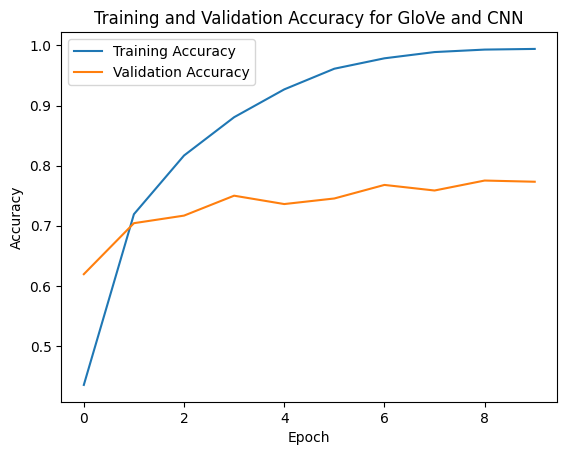

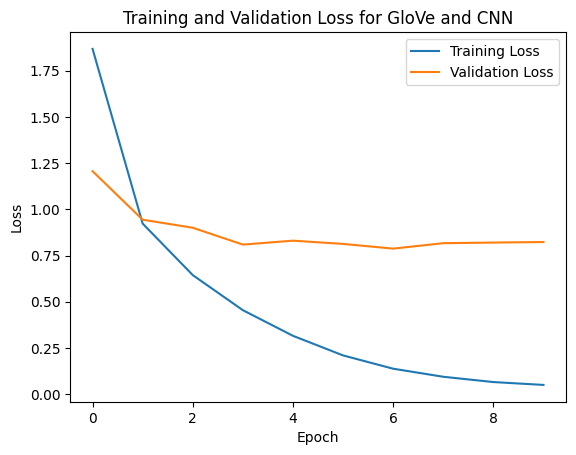

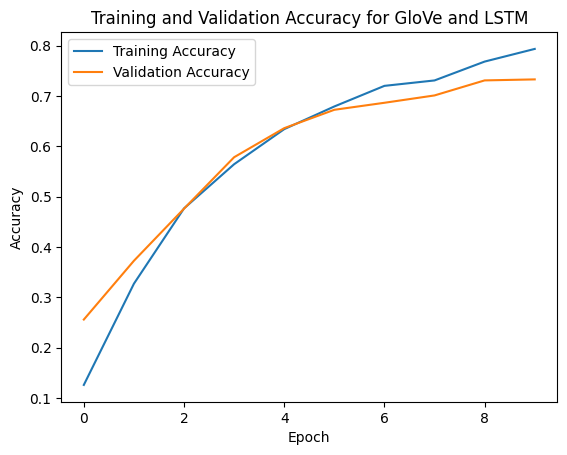

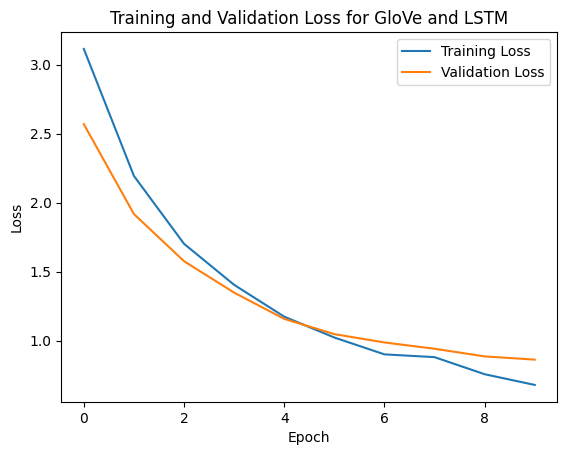

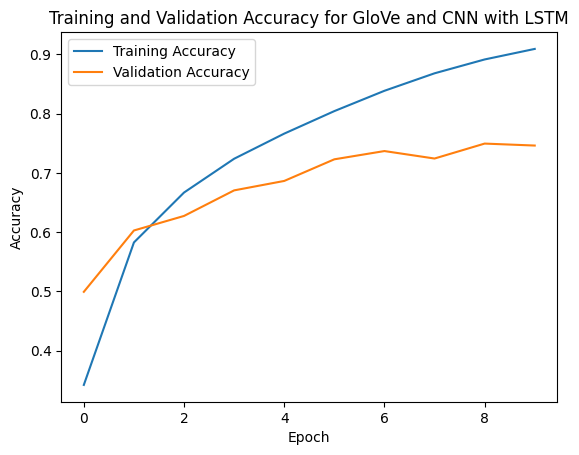

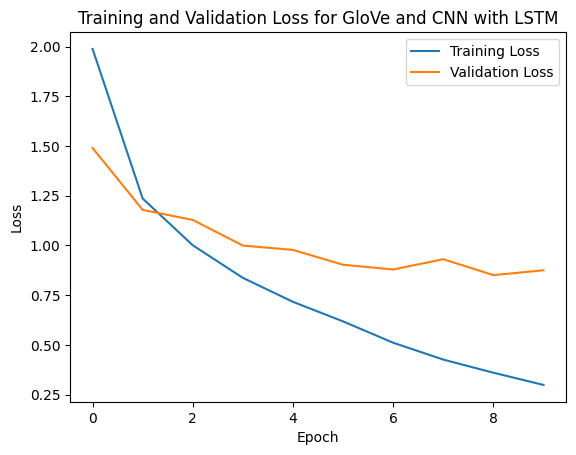

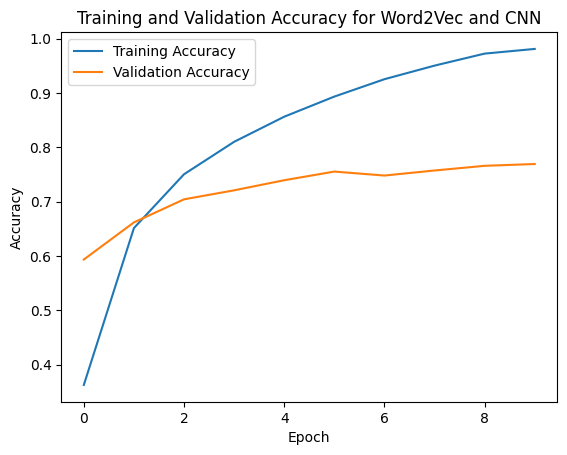

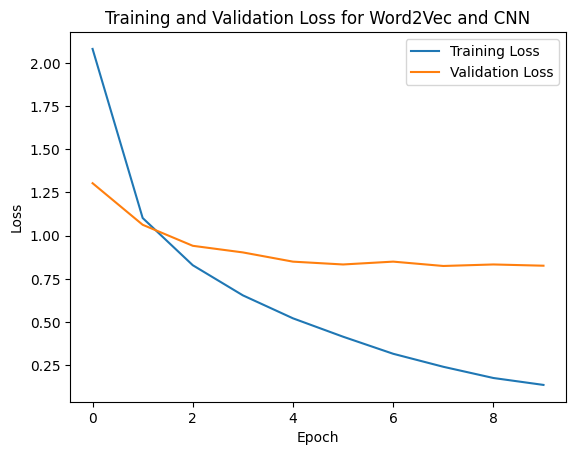

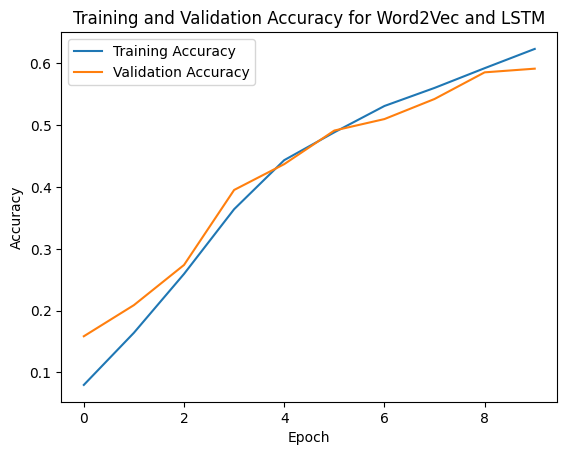

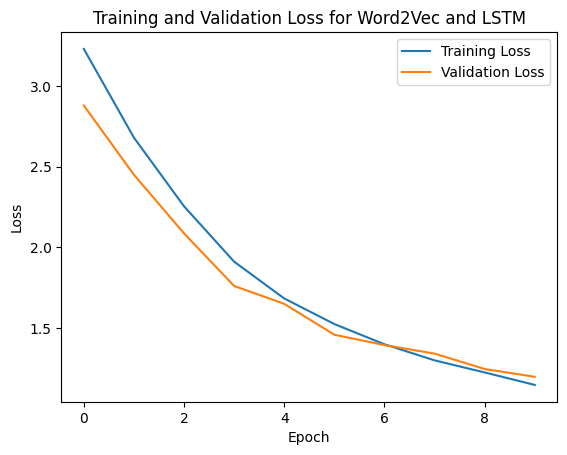

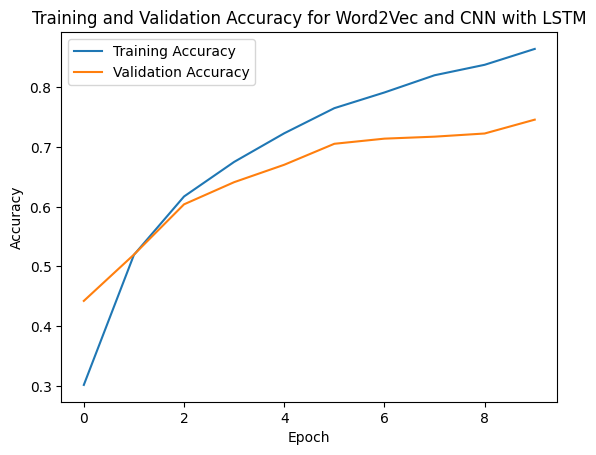

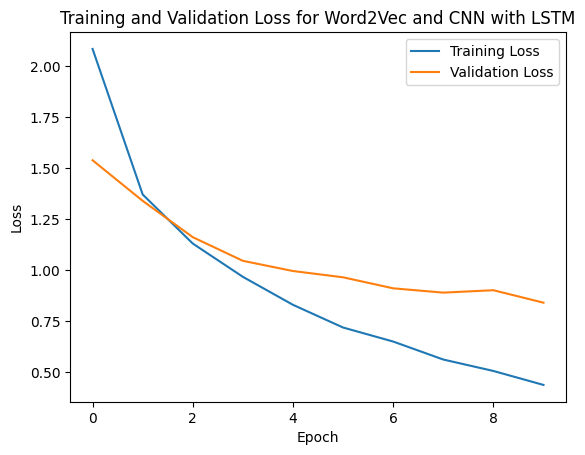

In [10]:
# Accuracy and loss plots for all combinations
for model in models:
    model.plot_accuracy()
    model.plot_loss()

In [11]:
glove_cnn_acc = glove_CNN.model_history.history['val_accuracy']
glove_lstm_acc = glove_LSTM.model_history.history['val_accuracy']
glove_combo_acc = glove_CNN_LSTM.model_history.history['val_accuracy']
word2vec_cnn_acc = word2vec_CNN.model_history.history['val_accuracy']
word2vec_lstm_acc = word2vec_LSTM.model_history.history['val_accuracy']
word2vec_combo_acc = word2vec_CNN_LSTM.model_history.history['val_accuracy']

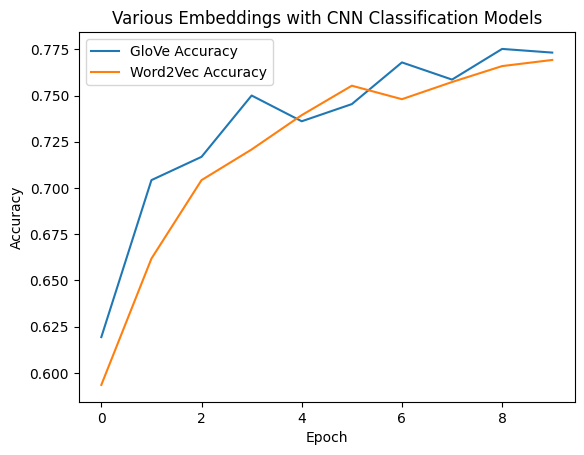

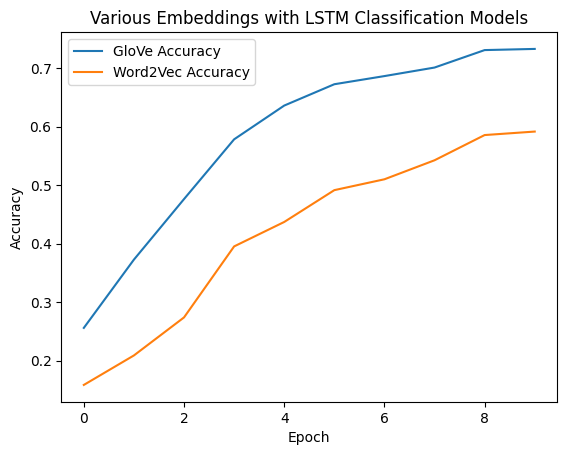

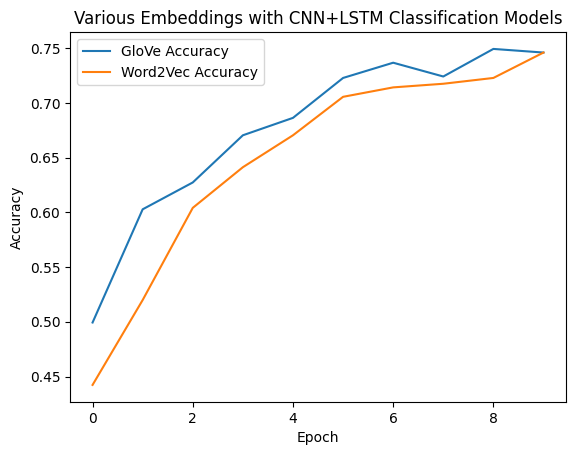

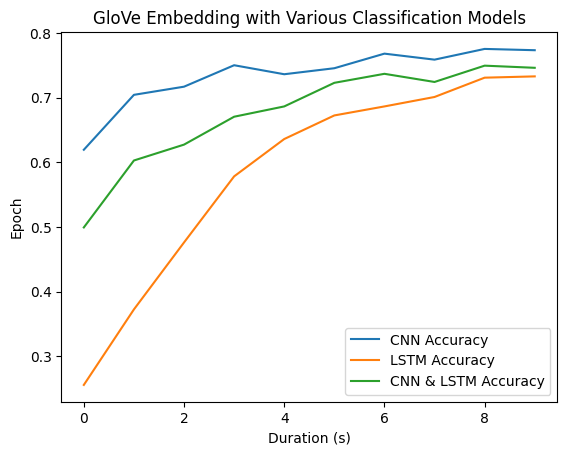

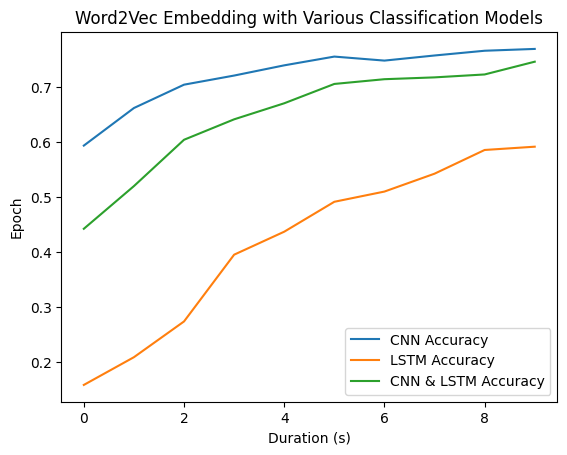

In [12]:
plotEmbeddingComparison("CNN", glove_cnn_acc, word2vec_cnn_acc)
plotEmbeddingComparison("LSTM", glove_lstm_acc, word2vec_lstm_acc)
plotEmbeddingComparison("CNN+LSTM", glove_combo_acc, word2vec_combo_acc)

plotModelComparison("GloVe", glove_cnn_acc, glove_lstm_acc, glove_combo_acc)
plotModelComparison("Word2Vec", word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)

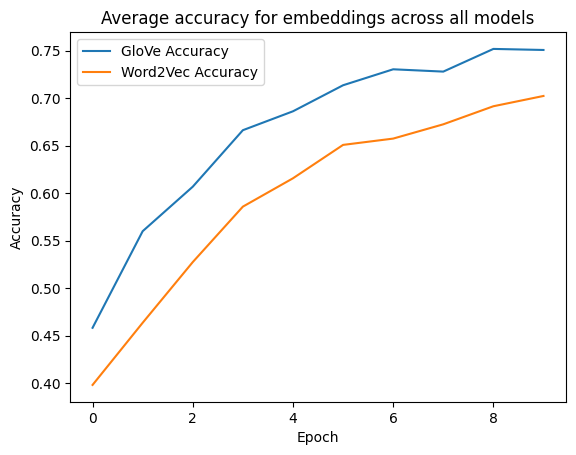

In [16]:
average_accuracy_for_all_embeddings(glove_cnn_acc, glove_lstm_acc, glove_combo_acc, word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)
average_accuracy_for_all_models(glove_cnn_acc, glove_lstm_acc, glove_combo_acc, word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)